# How many rows and columns are there in books.csv dataset?


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('books.csv')
num_rows, num_columns = df.shape
print(f"No.of rows in the dataset: {num_rows}")
print(f"No.of columns in the dataset: {num_columns}")

No.of rows in the dataset: 399
No.of columns in the dataset: 24


# How many books do not have an original title?

In [2]:
missing_original_title = df['original_title'].isnull().sum()
print(f"No.of books that do not have an original title: {missing_original_title}")

No.of books that do not have an original title: 36


# How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [4]:
df_cleaned = df.dropna(subset=['original_title'])
unique_books = df_cleaned['book_id'].nunique()
print(f"Unique books after removing null values in 'original_title': {unique_books}")

Unique books after removing null values in 'original_title': 363


# What is the average rating of all the books in the dataset based on ‘average_rating’?

In [6]:
average_rating = df['average_rating'].mean()
print(f"Average rating: {average_rating:.2f}")

Average rating: 3.98


# Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

In [7]:
books_2000 = df[df['original_publication_year'] == 2000]
number_books_2000 = len(books_2000)
print(f"2000 year published books: {number_books_2000}")

2000 year published books: 8


# Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

In [9]:
max_ratings_book = df.loc[df['work_ratings_count'].idxmax()]
max_ratings_title = max_ratings_book['title']
print(f"Maximum no.of ratings book: {max_ratings_title}")

Maximum no.of ratings book: The Diary of a Young Girl


# Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

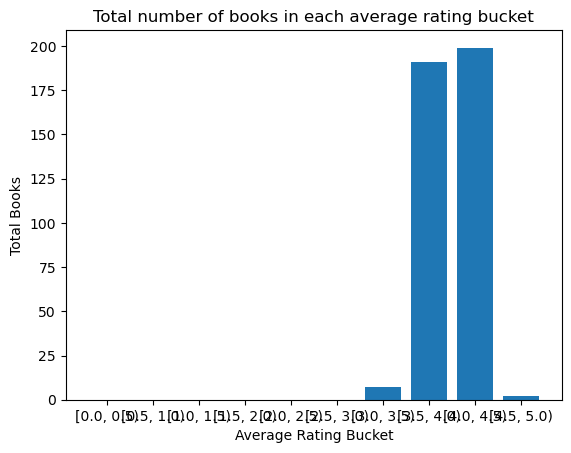

In [13]:
bins = np.arange(0, 5.1, 0.5)
df['rating_bucket'] = pd.cut(df['average_rating'], bins, right=False, precision=1)
rating_counts = df['rating_bucket'].value_counts().sort_index()
plt.bar(rating_counts.index.astype(str), rating_counts)
plt.xlabel('Average Rating Bucket')
plt.ylabel('Total Books')
plt.title('Total number of books in each average rating bucket')
plt.show()